In [1]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from google.colab import files

uploaded = files.upload()

Saving diabetes_012_health_indicators_BRFSS2015 (2).csv to diabetes_012_health_indicators_BRFSS2015 (2).csv


In [4]:
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015 (2).csv')
print(data.describe())
print(data.isnull().sum())

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

In [5]:
from sklearn.utils.class_weight import compute_class_weight

In [6]:
X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']

In [7]:
y = pd.get_dummies(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
nn_model = Sequential()
nn_model.add(Dense(21, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(y_train.shape[1], activation='softmax'))
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
6342/6342 [==============================] - 26s 4ms/step - loss: 0.4533 - accuracy: 0.8352 - val_loss: 0.4141 - val_accuracy: 0.8460
Epoch 2/10
6342/6342 [==============================] - 16s 3ms/step - loss: 0.4120 - accuracy: 0.8450 - val_loss: 0.4132 - val_accuracy: 0.8454
Epoch 3/10
6342/6342 [==============================] - 15s 2ms/step - loss: 0.4059 - accuracy: 0.8464 - val_loss: 0.4029 - val_accuracy: 0.8463
Epoch 4/10
6342/6342 [==============================] - 15s 2ms/step - loss: 0.4038 - accuracy: 0.8468 - val_loss: 0.4020 - val_accuracy: 0.8469
Epoch 5/10
6342/6342 [==============================] - 16s 3ms/step - loss: 0.4020 - accuracy: 0.8469 - val_loss: 0.3957 - val_accuracy: 0.8493
Epoch 6/10
6342/6342 [==============================] - 16s 3ms/step - loss: 0.4008 - accuracy: 0.8473 - val_loss: 0.3974 - val_accuracy: 0.8491
Epoch 7/10
6342/6342 [==============================] - 16s 2ms/step - loss: 0.3999 - accuracy: 0.8478 - val_loss: 0.3939 - val_ac

In [9]:
import numpy as np

In [10]:
# Evaluate the Neural Network
y_pred_probabilities = nn_model.predict(X_test)
y_pred_nn = np.argmax(y_pred_probabilities, axis=1)

# Classification Report
print("Neural Network Classification Report:\n", classification_report(y_test.idxmax(axis=1), y_pred_nn))

1586/1586 [==============================] - 3s 2ms/step
Neural Network Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.58      0.15      0.23      6997

    accuracy                           0.85     50736
   macro avg       0.48      0.38      0.38     50736
weighted avg       0.80      0.85      0.81     50736



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test.idxmax(axis=1), y_pred_nn, average='weighted')
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1_score:.4f}")

Weighted Precision: 0.8046
Weighted Recall: 0.8499
Weighted F1 Score: 0.8060


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
weights = nn_model.layers[0].get_weights()[0]
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': weights.mean(axis=0)})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

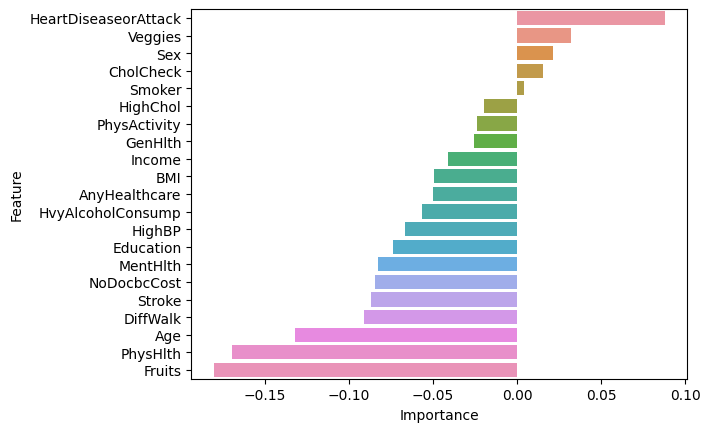

In [13]:
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.show()